In [90]:
import numpy as np
import json
import pandas as pd
import scanpy as sc
from scipy.sparse import csr_matrix
import anndata as ad
from collections import Counter
import matplotlib.pyplot as plt

In [2]:
hvgs = np.load('../data/pbmc_hvgs.npy', allow_pickle=True)
celltypes = np.load('../data/pbmc_celltypes.npy', allow_pickle=True)
ncells = np.load('../data/pbmc_ncells.npy', allow_pickle=True)

In [3]:
print(celltypes)

['erythrocyte' 'platelet' 'dendritic cell' 'natural killer cell'
 'CD4-positive, alpha-beta T cell' 'CD8-positive, alpha-beta T cell'
 'plasmacytoid dendritic cell' 'memory B cell' 'naive B cell'
 'gamma-delta T cell' 'regulatory T cell' 'transitional stage B cell'
 'naive thymus-derived CD4-positive, alpha-beta T cell'
 'naive thymus-derived CD8-positive, alpha-beta T cell'
 'central memory CD4-positive, alpha-beta T cell'
 'effector memory CD4-positive, alpha-beta T cell'
 'central memory CD8-positive, alpha-beta T cell'
 'effector memory CD8-positive, alpha-beta T cell'
 'CD4-positive, alpha-beta cytotoxic T cell'
 'CD16-negative, CD56-bright natural killer cell, human'
 'mucosal invariant T cell' 'plasmablast' 'conventional dendritic cell'
 'CD14-positive monocyte' 'innate lymphoid cell'
 'CD14-low, CD16-positive monocyte' 'double negative thymocyte'
 'hematopoietic precursor cell' 'peripheral blood mononuclear cell']


In [4]:
with open('../data/pbmc_vocab.json', 'r') as f:
    vocab = json.load(f)

In [5]:
pbmc_hvg = list(vocab.keys())[1:]

In [6]:
df = pd.DataFrame({'celltype' : celltypes, 'ncells': ncells})
idx_small_clusters = df[df.ncells < 1000].index.values

In [7]:
for idx in idx_small_clusters:
    inter = set(hvgs[idx]).intersection(set(pbmc_hvg))
    print(len(inter))

54
50
87
62
61
73


In [8]:
df[df.ncells < 5000]

,celltype,ncells
0,erythrocyte,290
1,platelet,1810
2,dendritic cell,181
4,"CD4-positive, alpha-beta T cell",773
5,"CD8-positive, alpha-beta T cell",305
6,plasmacytoid dendritic cell,1897
21,plasmablast,3754
22,conventional dendritic cell,4570
24,innate lymphoid cell,444
26,double negative thymocyte,1824


In [33]:
u =  set()
for i in [2, 4, 6]:
    print(len(hvgs[i]))
    u = u.union(set(hvgs[i]))

200
200
200


In [34]:
print(len(u))

528


In [41]:
data = np.load('../data/pmbc_smallTestSet.npy', allow_pickle=True)
celltypes = np.load('../data/pmbc_smallTestSet_celltypes.npy', allow_pickle=True)
genes = np.load('../data/pmbc_smallTestSet_genes.npy', allow_pickle=True)

In [42]:
celltypes = np.delete(celltypes, 1691)
data = np.delete(data, 1691, axis=0)

In [43]:
# np.where(celltypes == 'peripheral blood mononuclear cell')
# celltypes = np.delete(celltypes, 1691)

In [44]:
c = Counter(celltypes)
c

Counter({'central memory CD4-positive, alpha-beta T cell': 1052,
         'naive thymus-derived CD4-positive, alpha-beta T cell': 963,
         'natural killer cell': 749,
         'effector memory CD8-positive, alpha-beta T cell': 673,
         'naive B cell': 214,
         'transitional stage B cell': 174,
         'CD14-positive monocyte': 164,
         'effector memory CD4-positive, alpha-beta T cell': 162,
         'CD4-positive, alpha-beta cytotoxic T cell': 152,
         'naive thymus-derived CD8-positive, alpha-beta T cell': 148,
         'memory B cell': 117,
         'regulatory T cell': 117,
         'central memory CD8-positive, alpha-beta T cell': 83,
         'CD14-low, CD16-positive monocyte': 67,
         'mucosal invariant T cell': 47,
         'CD16-negative, CD56-bright natural killer cell, human': 36,
         'gamma-delta T cell': 32,
         'platelet': 17,
         'erythrocyte': 13,
         'hematopoietic precursor cell': 6,
         'conventional dendritic ce

In [46]:
data

array([[ 0,  0,  0, ..., 70, 59, 55],
       [ 0,  0,  0, ..., 86, 77, 88],
       [ 0,  0,  0, ..., 87, 87, 78],
       ...,
       [ 0,  0,  0, ..., 92, 87, 86],
       [ 0,  0,  0, ..., 75, 72, 80],
       [ 0,  0,  0, ..., 80, 91, 83]])

# Create adata object

In [47]:
counts = csr_matrix(data)
adata = ad.AnnData(counts)
adata.var_names = genes
adata.obs["cell_type"] = celltypes
adata.layers["counts"] = adata.X

In [48]:
adata

AnnData object with n_obs × n_vars = 4999 × 1500
    obs: 'cell_type'
    layers: 'counts'

# Normalization of "Count data"

In [49]:
sc.pp.normalize_total(adata)
sc.pp.log1p(adata)
#adata.X = adata.layers["scran_normalization"]

In [53]:
adata.X.toarray().shape

(4999, 1500)

In [52]:
# one vs all testing
sc.tl.rank_genes_groups(
    adata,
    method="wilcoxon",
    groupby="cell_type",
    key_added="dea_celltypes"
)

print(adata)

AnnData object with n_obs × n_vars = 4999 × 1500
    obs: 'cell_type'
    uns: 'log1p', 'dea_celltypes'
    layers: 'counts'


/usr/bin/my_programs/miniconda3/envs/transformer/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:394: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'names'] = self.var_names[global_indices]
/usr/bin/my_programs/miniconda3/envs/transformer/lib/python3.11/site-packages/scanpy/tools/_rank_genes_groups.py:396: PerformanceWarning: DataFrame is highly fragmented.  This is usually the result of calling `frame.insert` many times, which has poor performance.  Consider joining all columns at once using pd.concat(axis=1) instead. To get a de-fragmented frame, use `newframe = frame.copy()`
  self.stats[group_name, 'scores'] = scores[global_indices]
/usr/bin/my_programs/miniconda3/envs/transformer/lib/python3.11/site-packages/scanp

         Falling back to preprocessing with `sc.pp.pca` and default params.


/usr/bin/my_programs/miniconda3/envs/transformer/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


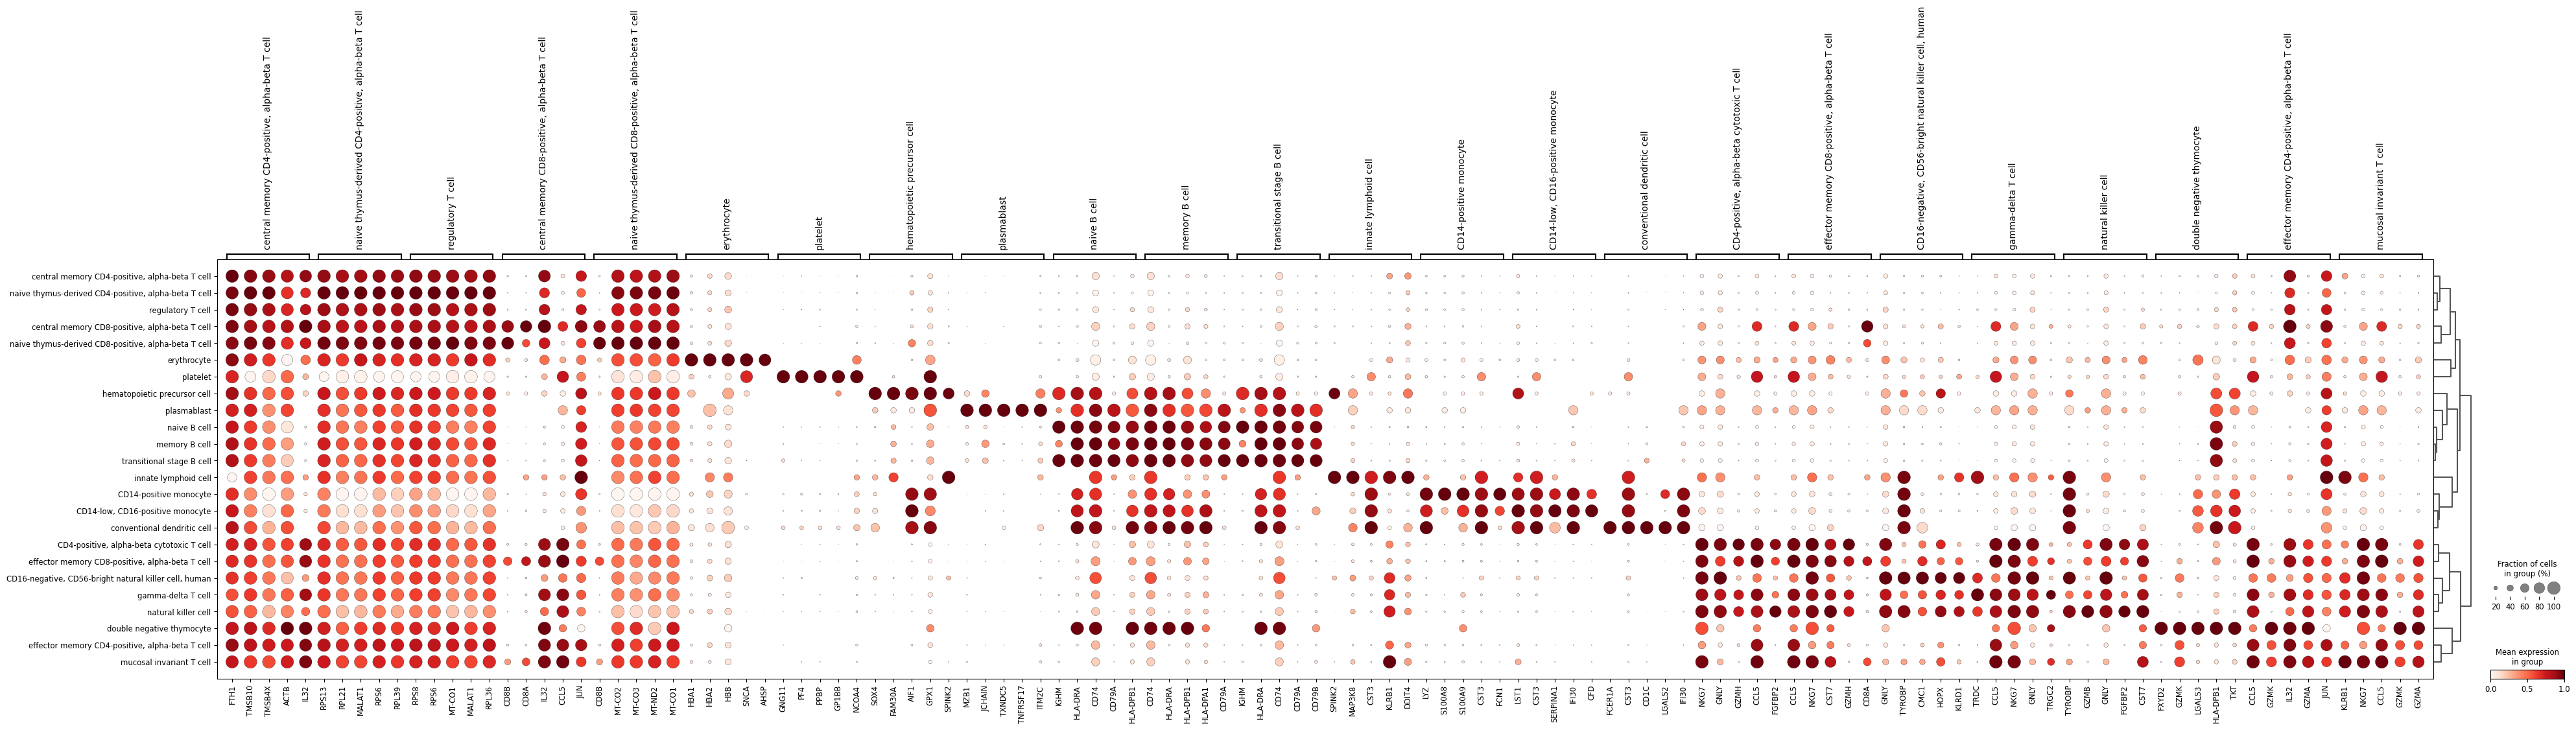

In [57]:
sc.pl.rank_genes_groups_dotplot(
    adata, groupby="cell_type", standard_scale="var", n_genes=5, key="dea_celltypes"
)

### filter more difefrentially expressed genes

In [58]:
sc.tl.filter_rank_genes_groups(
    adata,
    min_in_group_fraction=0.2,
    max_out_group_fraction=0.2,
    key="dea_celltypes",
    key_added="dea_celltypes_filtered",
)

/usr/bin/my_programs/miniconda3/envs/transformer/lib/python3.11/site-packages/scanpy/plotting/_dotplot.py:749: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap', 'norm' will be ignored
  dot_ax.scatter(x, y, **kwds)


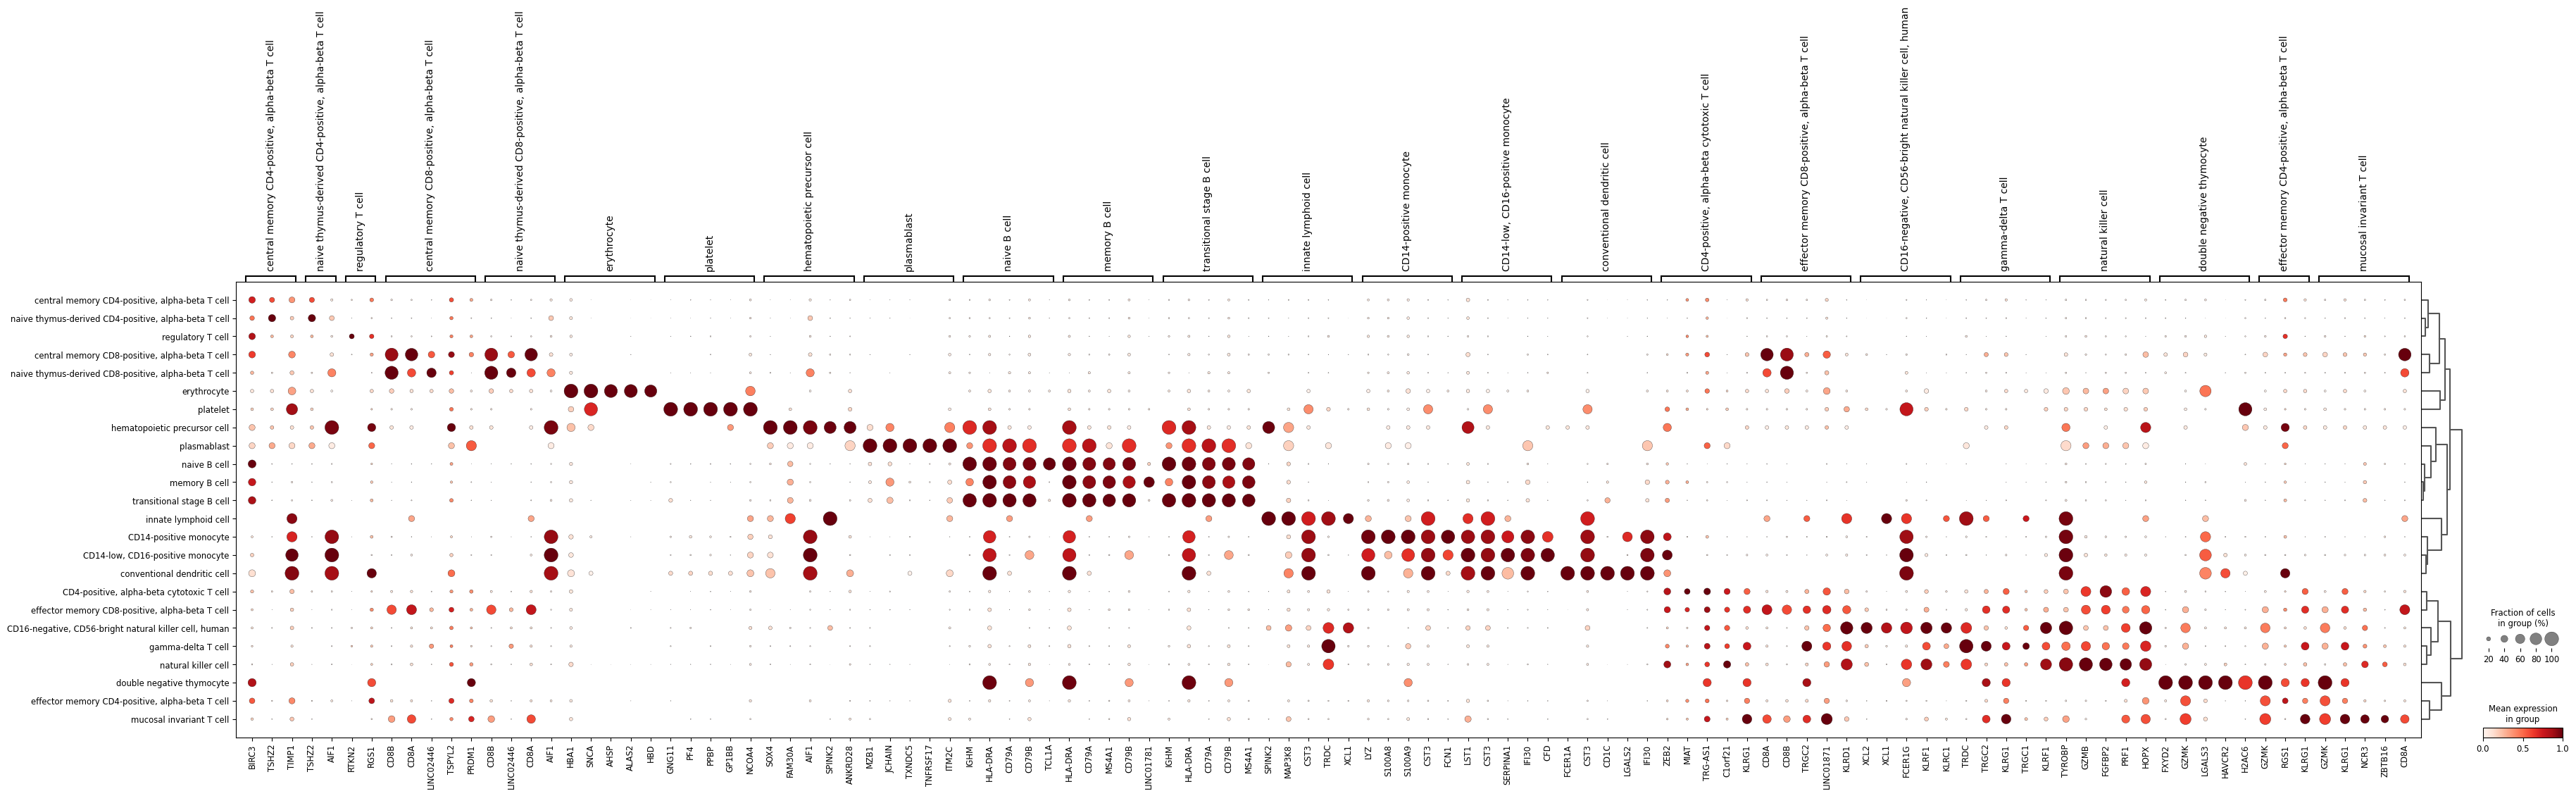

In [60]:
sc.pl.rank_genes_groups_dotplot(
    adata,
    groupby="cell_type",
    standard_scale="var",
    n_genes=5,
    key="dea_celltypes_filtered",
)

In [ ]:
['LYZ', 'S100A8', 'S100A9', 'CST3', 'FCN1']

# Evaluation of Dotplot

The Dots on the diagonal are cluster specific (= cell type specific) expressed genes. In the following, celltypes will be listed that agree with marker genes from the literature

naive B-cell
conventional dentritic cell (2/5)
natural killer cell (4/5)
CD14-positive monocyte (4/5) of canonical genes!

### Plotting cell specific marker genes

In [63]:
# calculate neighboring graph and embedd data with umap
sc.pp.neighbors(adata, n_neighbors=10, n_pcs=50)
sc.tl.umap(sc.tl.umap(adata))

In [64]:
adata

AnnData object with n_obs × n_vars = 4999 × 1500
    obs: 'cell_type'
    uns: 'log1p', 'dea_celltypes', 'dendrogram_cell_type', 'dea_celltypes_filtered', 'neighbors', 'umap'
    obsm: 'X_pca', 'X_umap'
    layers: 'counts'
    obsp: 'distances', 'connectivities'

In [70]:
adata.obs['cell_type']

0          central memory CD4-positive, alpha-beta T cell
1                                     natural killer cell
2       naive thymus-derived CD4-positive, alpha-beta ...
3         effector memory CD8-positive, alpha-beta T cell
4         effector memory CD8-positive, alpha-beta T cell
                              ...                        
4994                                             platelet
4995       central memory CD4-positive, alpha-beta T cell
4996                                        memory B cell
4997    naive thymus-derived CD4-positive, alpha-beta ...
4998      effector memory CD4-positive, alpha-beta T cell
Name: cell_type, Length: 4999, dtype: category
Categories (24, object): ['CD4-positive, alpha-beta cytotoxic T cell', 'CD14-low, CD16-positive monocyte', 'CD14-positive monocyte', 'CD16-negative, CD56-bright natural killer cel..., ..., 'plasmablast', 'platelet', 'regulatory T cell', 'transitional stage B cell']

In [65]:
marker_genes = {'naive B-cell' : ['IGHM', 'HLA-DRA', 'CD79A', 'CD79B', 'TCL1A'],
              'conventional dentritic cell' : ['FCER1A', 'CST3', 'CD1C', 'LAGLS2', 'IFI30'],
              'natural killer cell' : ['KLRF1', 'TYROBP', 'GZMB', 'FGFBP2', 'PRF1', 'HOPX'],
              'CD14-positive monocyte' : ['LYZ', 'S100A8', 'S100A9', 'CST3', 'FCN1']}

In [84]:
naive_bcell = np.repeat('other', len(celltypes))
idx_select = np.where(celltypes == 'naive B cell')[0]
naive_bcell[idx_select] = 'naive B cell'
adata.obs['b_cell'] = naive_bcell

/usr/bin/my_programs/miniconda3/envs/transformer/lib/python3.11/site-packages/scanpy/plotting/_tools/scatterplots.py:392: UserWarning: No data for colormapping provided via 'c'. Parameters 'cmap' will be ignored
  cax = scatter(


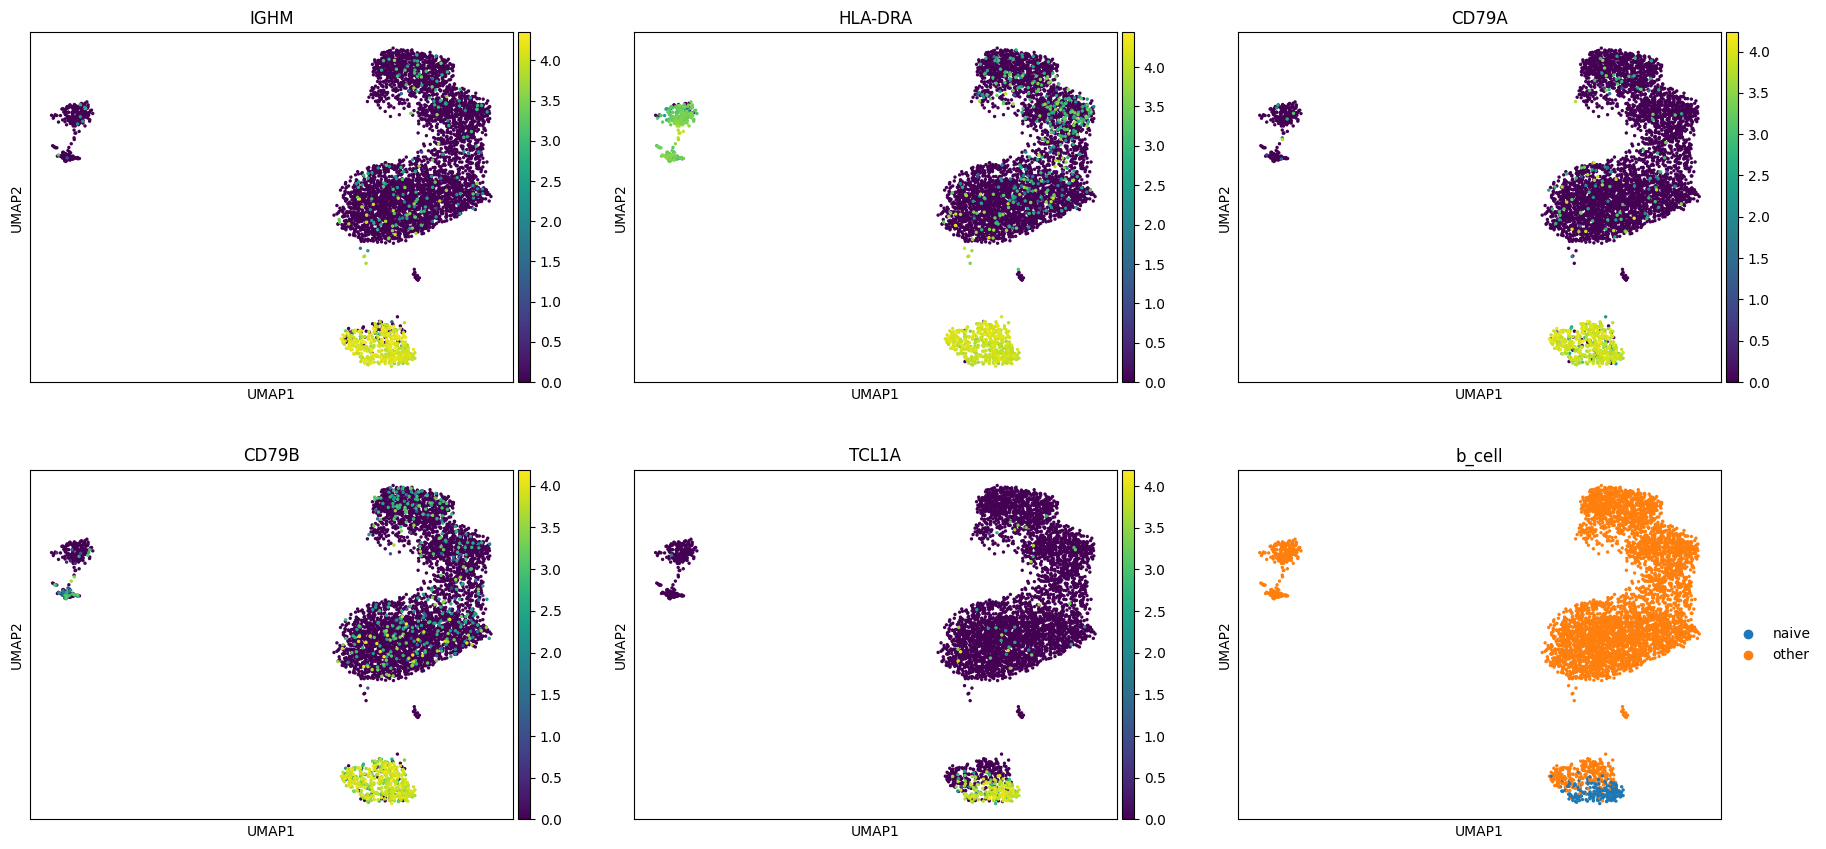

In [87]:
fig = sc.pl.umap(adata, color=marker_genes['naive B-cell'] + ['b_cell'], return_fig=True, ncols=3)

In [101]:
fig.suptitle('This is a somewhat long figure title', fontsize=16)
fig.savefig('test.png')

In [ ]:
marker_genes = {'natural killer cell': ['GZMB', 'TYROBP', 'PRF1', 'FGFBP2', 'KLRF1'],
               'naive B cell': ['IGHM', 'HLA-DRA', 'CD79A', 'CD79B', 'IGHD'],
                'CD14-low, CD16-positive monocyte': ['LST1', 'IFI30', 'CST3', 'SERPINA1', 'MS4A7']
                'CD14-positive monocyte': ['LYZ', 'S100A8', 'S100A9', 'FCN1', 'CST3'].
                'naive thymus-derived CD8-positive, alpha-beta T cell': ['CD8B', 'NC02446', 'CD8A', 'AIF1', 'S100B']
               }

In [98]:
Counter(celltypes)

Counter({'central memory CD4-positive, alpha-beta T cell': 1052,
         'naive thymus-derived CD4-positive, alpha-beta T cell': 963,
         'natural killer cell': 749,
         'effector memory CD8-positive, alpha-beta T cell': 673,
         'naive B cell': 214,
         'transitional stage B cell': 174,
         'CD14-positive monocyte': 164,
         'effector memory CD4-positive, alpha-beta T cell': 162,
         'CD4-positive, alpha-beta cytotoxic T cell': 152,
         'naive thymus-derived CD8-positive, alpha-beta T cell': 148,
         'memory B cell': 117,
         'regulatory T cell': 117,
         'central memory CD8-positive, alpha-beta T cell': 83,
         'CD14-low, CD16-positive monocyte': 67,
         'mucosal invariant T cell': 47,
         'CD16-negative, CD56-bright natural killer cell, human': 36,
         'gamma-delta T cell': 32,
         'platelet': 17,
         'erythrocyte': 13,
         'hematopoietic precursor cell': 6,
         'conventional dendritic ce